In [0]:
folder_path = 'drive/My Drive/pokedex'

In [0]:
import os
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
folders = os.listdir(folder_path)
print(folders)

['Meowth', 'Pikachu', 'Bulbasaur']


In [0]:
image_data = []
labels = []

label_dict = {
    "Meowth":0,
    "Pikachu":1,
    "Bulbasaur":2
}

In [0]:
for ix in folders:
  path = os.path.join(folder_path,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=(224,224))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [0]:
print(len(image_data), len(labels))

663 663


In [0]:
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [0]:
print(labels[:5])

[1, 1, 2, 0, 1]


In [0]:
print(type(combined[0]))
print(len(combined[0]))

<class 'tuple'>
2


In [0]:
import numpy as np
XTrain = np.array(image_data)
YTrain = np.array(labels)

print(XTrain.shape,YTrain.shape)

(663, 224, 224, 3) (663,)


In [0]:
from keras.utils import np_utils
YTrain = np_utils.to_categorical(YTrain)
print(XTrain.shape,YTrain.shape)

(663, 224, 224, 3) (663, 3)


In [0]:
# Create the Model Resnet 50 Model
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model
import matplotlib.pyplot as plt

In [0]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(3,activation='softmax')(d1)

model_new = Model(input=model.input,outputs=fc2)
model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [0]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [0]:
for ix in range(len(model_new.layers)):
  print(ix,model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7fbbc72ee0f0>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7fbbc72ee1d0>
2 <keras.layers.convolutional.Conv2D object at 0x7fbbc72ee208>
3 <keras.layers.normalization.BatchNormalization object at 0x7fbbc72ee3c8>
4 <keras.layers.core.Activation object at 0x7fbbc72f5240>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7fbbc72ee8d0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7fbbc72eea90>
7 <keras.layers.convolutional.Conv2D object at 0x7fbbc72eec88>
8 <keras.layers.normalization.BatchNormalization object at 0x7fbbc7283c50>
9 <keras.layers.core.Activation object at 0x7fbbc729bd30>
10 <keras.layers.convolutional.Conv2D object at 0x7fbbc72a2518>
11 <keras.layers.normalization.BatchNormalization object at 0x7fbbc72b57b8>
12 <keras.layers.core.Activation object at 0x7fbbc72bbeb8>
13 <keras.layers.convolutional.Conv2D object at 0x7fbbc7250da0>
14 <keras.layers.convolutional.Conv2D object at 0x7fbbc7268e48>
15 <keras.lay

In [0]:
for ix in range(169):
  model_new.layers[ix].trainable = False

model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model_new.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
hist = model_new.fit(XTrain,YTrain,shuffle=True,batch_size=16,epochs=28,validation_split=0.2)

Train on 530 samples, validate on 133 samples
Epoch 1/28
530/530 [==============================] - 6s 12ms/step - loss: 1.0594 - accuracy: 0.5377 - val_loss: 0.7808 - val_accuracy: 0.6316
Epoch 2/28
530/530 [==============================] - 3s 5ms/step - loss: 0.6101 - accuracy: 0.7679 - val_loss: 0.5394 - val_accuracy: 0.7820
Epoch 3/28
530/530 [==============================] - 3s 5ms/step - loss: 0.4260 - accuracy: 0.8321 - val_loss: 0.4473 - val_accuracy: 0.8195
Epoch 4/28
530/530 [==============================] - 3s 5ms/step - loss: 0.3103 - accuracy: 0.8925 - val_loss: 0.3782 - val_accuracy: 0.8346
Epoch 5/28
530/530 [==============================] - 3s 5ms/step - loss: 0.2777 - accuracy: 0.9057 - val_loss: 0.3544 - val_accuracy: 0.8571
Epoch 6/28
530/530 [==============================] - 3s 5ms/step - loss: 0.2724 - accuracy: 0.9113 - val_loss: 0.3250 - val_accuracy: 0.8872
Epoch 7/28
530/530 [==============================] - 3s 5ms/step - loss: 0.1925 - accuracy: 0.9509 -

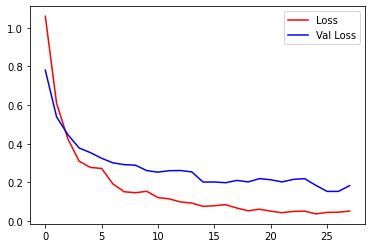

In [0]:
h = hist.history

# Visualizing loss
plt.plot(h['loss'],'r',label='Loss')
plt.plot(h['val_loss'],'b',label='Val Loss')
plt.legend()
plt.show()

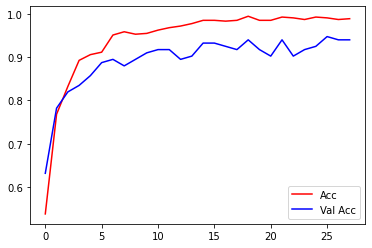

In [0]:
# Visualizing accuracy
plt.plot(h['accuracy'],'r',label='Acc')
plt.plot(h['val_accuracy'],'b',label='Val Acc')
plt.legend()
plt.show()

In [0]:
#model.predict(XTrain)